# DSR 20 - Backprop course

## 1. perceptron and the delta rule

#### Perceptron training:
1. Initialize weights vector with small random numbers
2. Repeat until convergence:
    Loop over feature vector (𝑥j) and labels (li) in training set D.
    Take 𝑥 and pass it through the perceptron, calculating the output values: 
    $$ y_{j}=w(t)\cdot x_{j}=ƒ(w(t)){x_{j}}$$
    Update weights: 
    $$ w_{i}(t+1)=w_{i}(t)+𝛼(l_{j}-y_{j})x_{j}$$  
    for all 0 <= i < n
3. Terminate criterion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Perceptron:
    # N is the length of are input feature 
    # alpha learning rate
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N ) / np.sqrt(N)
        self.N = N
        self.alpha = alpha
        
        
    def step(self, x):
        # apply a step activation function
        return 1 if x > 0 else 0
    
    def fit(self, X, y, epochs=10, addBias=True):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        if addBias:
            print(addBias)
            X = np.c_[X, np.ones((X.shape[0]))]
            self.W = np.random.randn(self.N+1) / np.sqrt(self.N)
        w =  self.W   
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
                for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                    p = self.step(np.dot(x, self.W))
                    # perform weight update if prediction
                    # does not match trget
                    if p != target:
                        # calculate delta
                        delta =  p - target
                        # update the weight matrix
                        self.W += -self.alpha * delta * x 
                        w = np.append(w,self.W)
        return w
    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
            # take the dot product between the input features and the
            # weight matrix, then pass the value through the step
            # function
        return self.step(np.dot(X, self.W))
    

In [62]:
# construct the OR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20,addBias=False)

training perceptron...


array([1.14163831, 0.59972215])

In [63]:
# now that our perceptron is trained we can evaluate it
print("testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=False)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))

testing perceptron...
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=1, pred=1
data=[1 0], true_label=1, pred=1
data=[1 1], true_label=1, pred=1


# save the weights during training and plot 

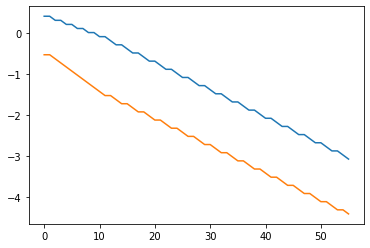

In [64]:
## change the Perceptron class such that you save the weights 
##during training and return them then plot them
p = Perceptron(X.shape[1], alpha=0.1)
w=p.fit(X, y, epochs=20,addBias=False)
plt.plot(w[0:len(w):2])
plt.plot(w[1:len(w):2])

# Repeat now with bias (addBias=True), what happend to the weights?

True


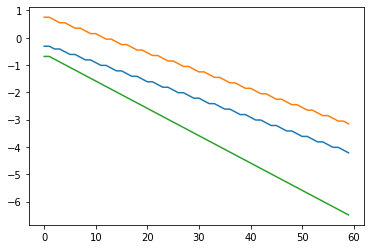

In [65]:
p = Perceptron(X.shape[1], alpha=0.1)
w=p.fit(X, y, epochs=20,addBias=True)
plt.plot(w[0:len(w):3])
plt.plot(w[1:len(w):3])
plt.plot(w[2:len(w):3])

## change the learning rate how are the weights changing now?

True


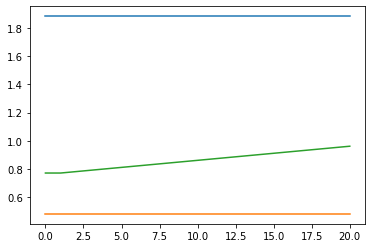

In [66]:
p = Perceptron(X.shape[1], alpha=0.01)
w=p.fit(X, y, epochs=20,addBias=True)
plt.plot(w[0:len(w):3])
plt.plot(w[1:len(w):3])
plt.plot(w[2:len(w):3])


### 1. Repeat all steps for an AND data set
### 2. Repeat all steps for a XOR data set


True


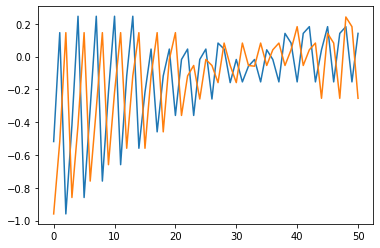

In [8]:
# construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

### ENTER YOUR CODE HERE
p = Perceptron(X.shape[1], alpha=0.1)
w=p.fit(X, y, epochs=30,addBias=True)
plt.plot(w[0:len(w):2])
plt.plot(w[1:len(w):2])
# plt.plot(w[2:len(w):3])


In [9]:
# now that our perceptron is trained we can evaluate it
print("testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))

testing perceptron...
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=0, pred=0
data=[1 0], true_label=0, pred=0
data=[1 1], true_label=1, pred=1


True


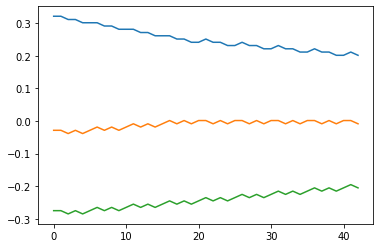

In [41]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
p = Perceptron(X.shape[1], alpha=0.01)
w=p.fit(X, y, epochs=20,addBias=True)
plt.plot(w[0:len(w):3])
plt.plot(w[1:len(w):3])
plt.plot(w[2:len(w):3])
### ENTER YOUR CODE HERE

### Perceptron for a regression problem

In [13]:
X = np.arange (0,100,1)
noise = np.random.normal(loc=0.0, scale=5, size=100)
y = 70 + 1.2*X + noise

# normalization of inputs and lables 
y=y/np.max(X)
X=X/np.max(X)

In [21]:
y.shape

(100,)

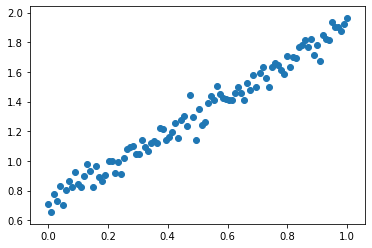

In [14]:
plt.scatter(X, y)

#### How should you change the activation function to fit a regression problem???

In [85]:
# implement the perceptron class here for regression

class Perceptron:
    # N is the length of are input feature 
    # alpha learning rate
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N ) / np.sqrt(N)
        self.N = N
        self.alpha = alpha
        
        
    def step(self, x):
        # apply a linear activation
        return x if x > 0 else 0
    
    def fit(self, X, y, epochs=10, addBias=True):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        if addBias:
            print(addBias)
            X = np.c_[X, np.ones((X.shape[0]))]
            self.W = np.random.randn(self.N+1) / np.sqrt(self.N)
            
        # loop over the desired number of epochs
        w = self.W
       
        for epoch in np.arange(0, epochs):
        # loop over each individual data point
            for (x, target) in zip(X, y):
            # take the dot product between the input features
            # and the weight matrix, then pass this value
            # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))
                # perform weight update if prediction
                # does not match trget
                #if p != target:
                    # calculate delta
                delta = p - target
                    # update the weight matrix
                self.W += -self.alpha * delta * x
            w = np.append(w,[self.W])
                   
        return w
    
    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        
        
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
            # take the dot product between the input features and the
            # weight matrix, then pass the value through the step
            # function
        
        return self.step(np.dot(X, self.W))

In [86]:
# define our perceptron and train it

p = Perceptron(1, alpha=0.1)
p.fit(X, y, epochs=20,addBias=True)
print("training perceptron...")


True
training perceptron...


(10,)


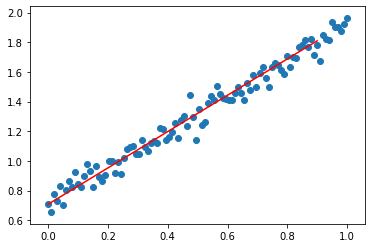

In [87]:
# PLOT DATA AS ABOVE AND ADD A PLOT OF THE PREDICTION
### ENTER YOUR CODE HERE
plt.scatter(X,y)
x = np.arange(0,1,0.1)
print(x.shape)
predictions=[]
for xx in x:
    pred=p.predict(xx,addBias=True)
    predictions.append(pred)
plt.plot(x,predictions,c="red")    

In [42]:
# PLOT THE WEIGHTS AS A FUNCTION OF TRAINING


### 1.  repeat the training without bias (addBias = False) , what happend?
### 2.  repeat the training without the normalization of the data, what happend?